#Predicting Insurance Costs Using Machine Learning

### Objective:
The goal of this project is to predict the insurance costs (charges) for individuals based on various factors such as age, BMI (Body Mass Index), smoking status, region, and number of children. Insurance costs are influenced by a combination of demographic, health, and lifestyle factors,
and understanding these relationships can help insurers set accurate premiums and help individuals anticipate their healthcare expenses.

### Dataset:
The dataset used in this project contains information about 1,338 individuals, including their:

 - Age
 - Sex
 - BMI
 - Number of children
 - Smoking

In this section, we import the necessary libraries for data analysis, visualization, and machine learning.

- Pandas and NumPy are used for data manipulation and numerical operations.

- Matplotlib and Seaborn are used for data visualization.

- Scikit-learn provides tools for data preprocessing, model training, and evaluation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
insurance_df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The frequency distribution across region and sex appears to be relatively balanced, indicating that the dataset has a fairly even representation of individuals from different regions and both genders.

<Axes: ylabel='region'>

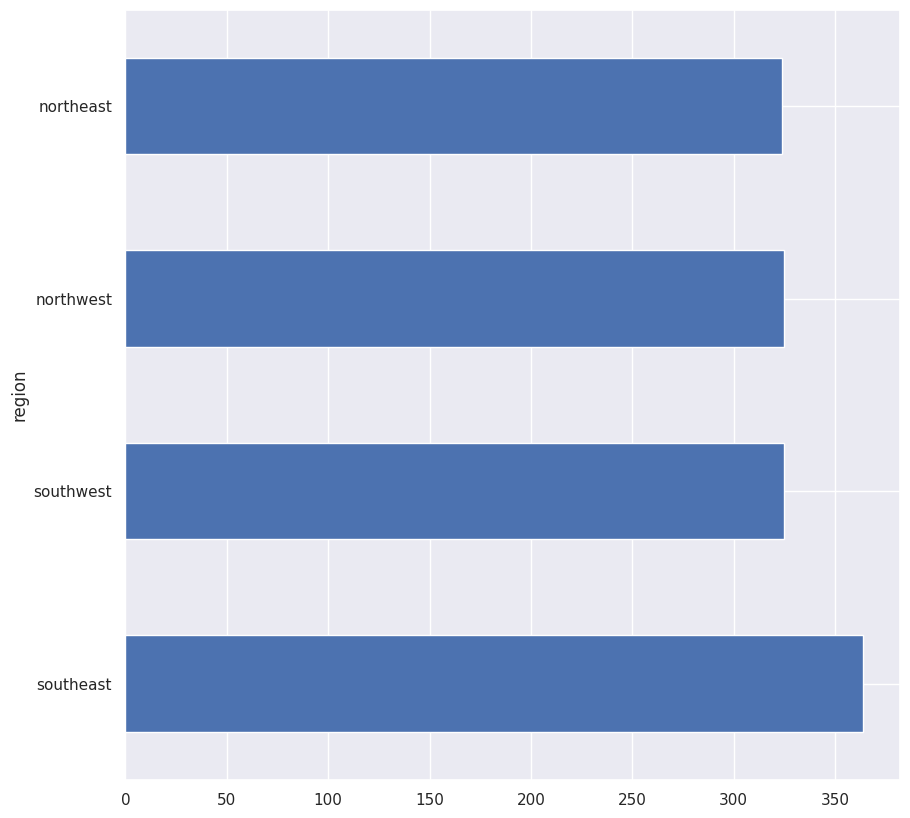

In [ ]:
insurance_df['region'].value_counts().plot(kind='barh')

<Axes: ylabel='sex'>

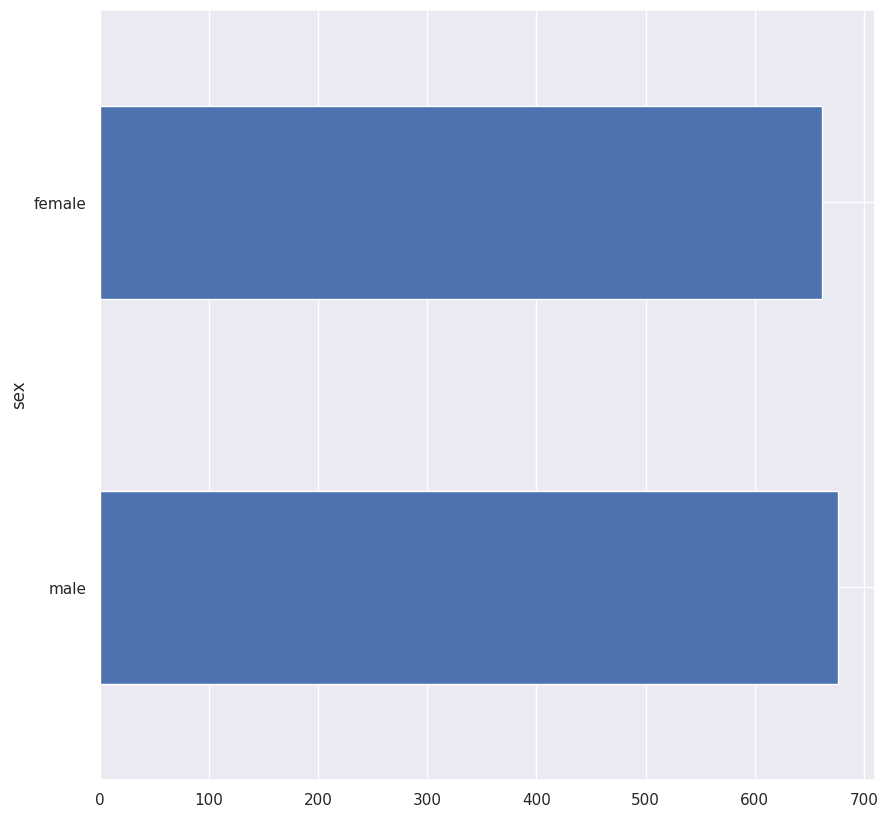

In [ ]:
insurance_df['sex'].value_counts().plot(kind='barh')

The "children" category exhibits the highest variability in the dataset, indicating a wide range in the number of children per individual, which could significantly influence insurance costs.

<Axes: ylabel='children'>

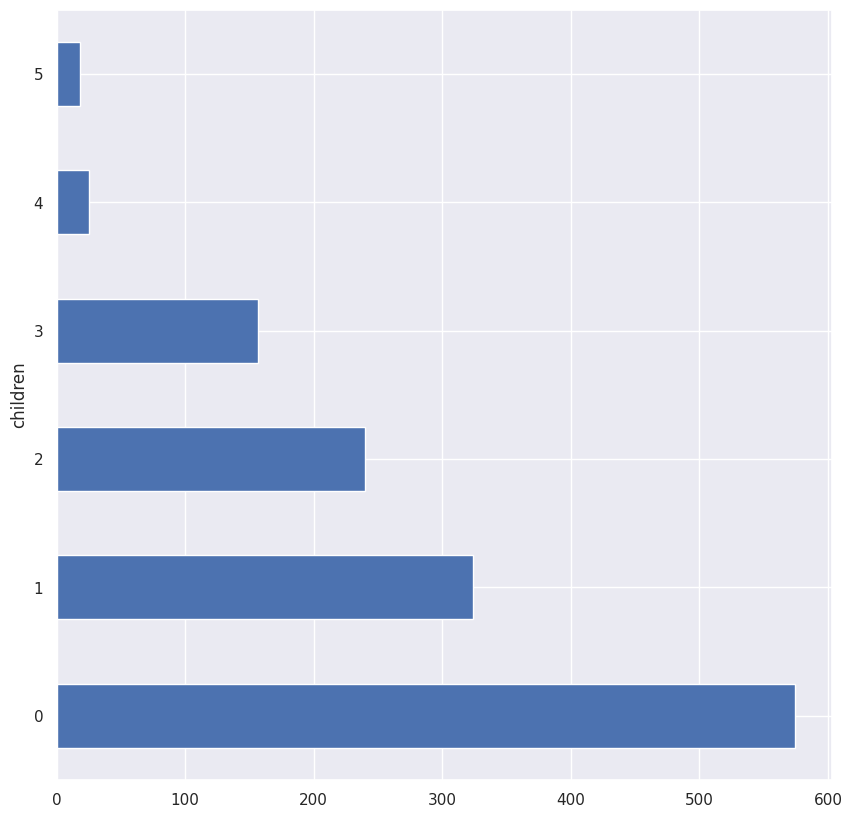

In [ ]:
insurance_df['children'].value_counts().plot(kind='barh')

In [ ]:
insurance_cat_columns = []
insurance_num_columns = []
for column in insurance_df.columns:
  if insurance_df[column].dtype == int or insurance_df[column].dtype == float:
    insurance_num_columns.append(column)
  else:
    insurance_cat_columns.append(column)

print(insurance_cat_columns,"\n",insurance_num_columns)

insurance_w_dummies = pd.get_dummies(insurance_df,columns=insurance_cat_columns, drop_first=True)
insurance_w_dummies

['sex', 'smoker', 'region'] 
 ['age', 'bmi', 'children', 'charges']


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


### Data Visualization:

- **Violin Plots:** Used to visualize the distribution of insurance charges across different categories (e.g., smoker vs. non-smoker, regions).
- **Correlation Heatmap:** Generated to identify the strength of relationships between variables.
- **Histograms:** Plotted to understand the distribution of numerical features like age, BMI, and charges.

### Predictive Power:

The violin chart visually confirms what the correlation analysis and model coefficients suggest: smoking status is a strong predictor of insurance costs. The wide variability in charges for smokers provides the model with a clear signal to differentiate between the two groups, improving its predictive accuracy.


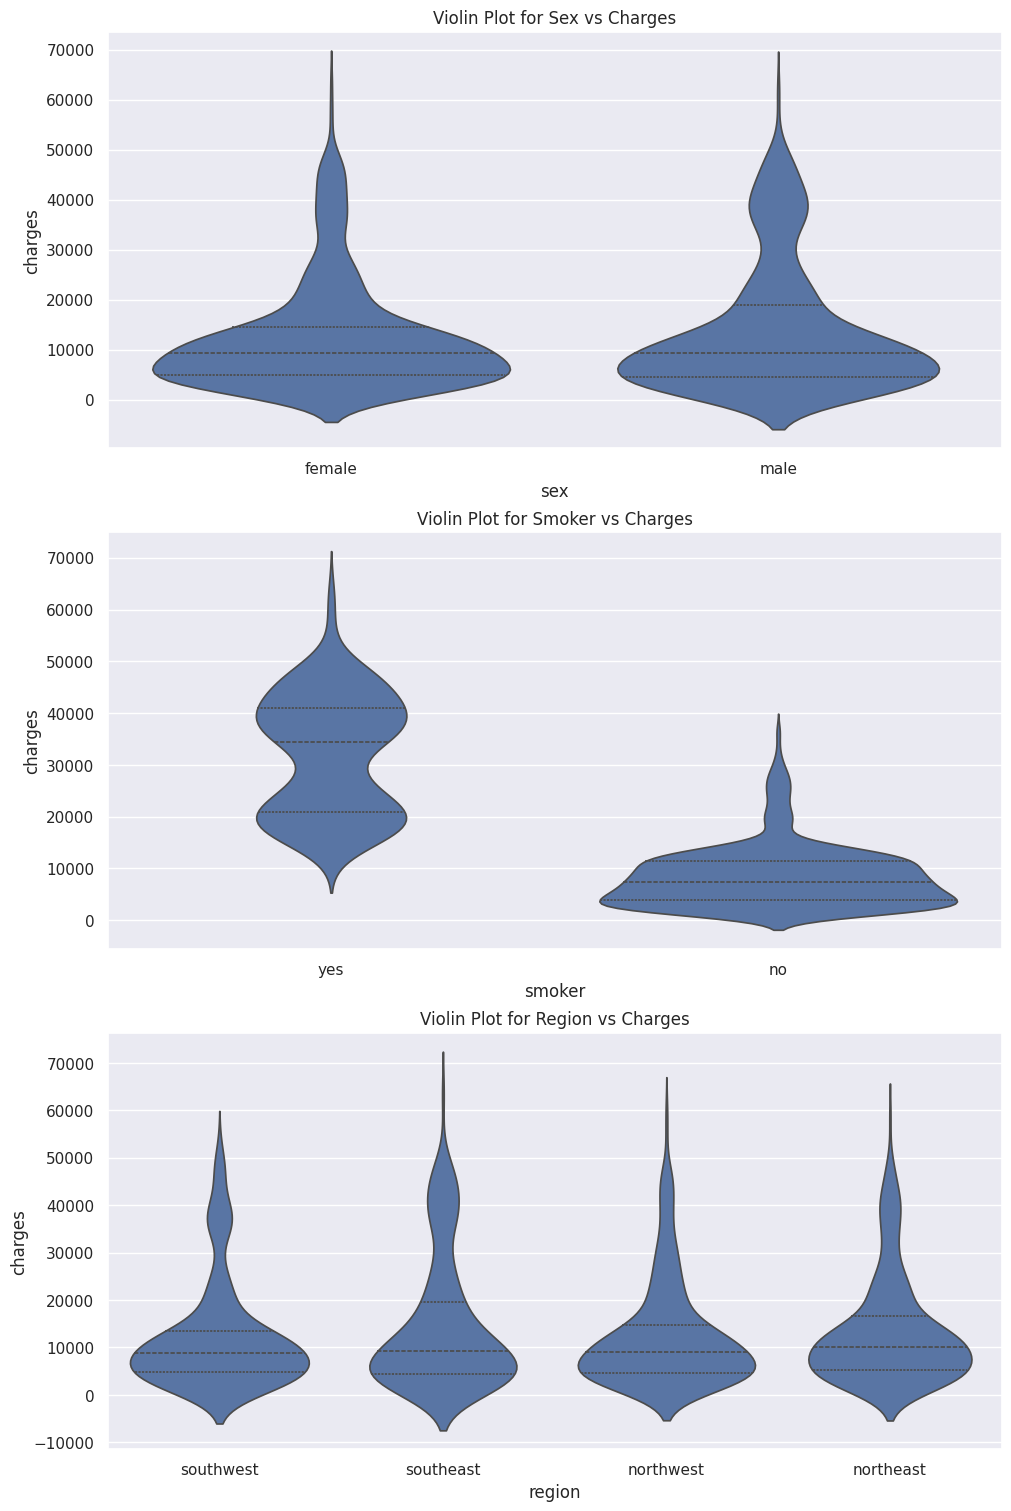

In [ ]:
fig, ax = plt.subplots(nrows=len(insurance_cat_columns),ncols=1, figsize=(10,15), constrained_layout=True)
for index, column in enumerate(insurance_cat_columns):
  sns.violinplot(data=insurance_df,x=column,y='charges',ax=ax[index],inner='quartile')
  ax[index].set_title(f'Violin Plot for {column.title()} vs Charges')

#### Key Findings:

**Strong Influence of Smoking Status:**
The analysis revealed that smoking status is the most significant factor influencing insurance costs. Smokers tend to have significantly higher insurance charges compared to non-smokers. This is evident from the high correlation coefficient (0.787) between the smoker_yes variable and charges.

**Age as a Contributing Factor:**
Age also showed a positive correlation with insurance charges (correlation coefficient: 0.299). As individuals grow older, their insurance costs tend to increase, likely due to higher health risks associated with aging.

**Weak Influence of Other Factors:**
Factors like BMI, number of children, and region had relatively weak correlations with insurance charges. While BMI showed a slight positive correlation (0.198), the number of children and region had minimal impact on the target variable.


In [ ]:
abs(insurance_w_dummies.corr().loc['charges'])

,charges
age,0.299008
bmi,0.198341
children,0.067998
charges,1.000000
sex_male,0.057292
smoker_yes,0.787251
region_northwest,0.039905
region_southeast,0.073982
region_southwest,0.043210


<Axes: >

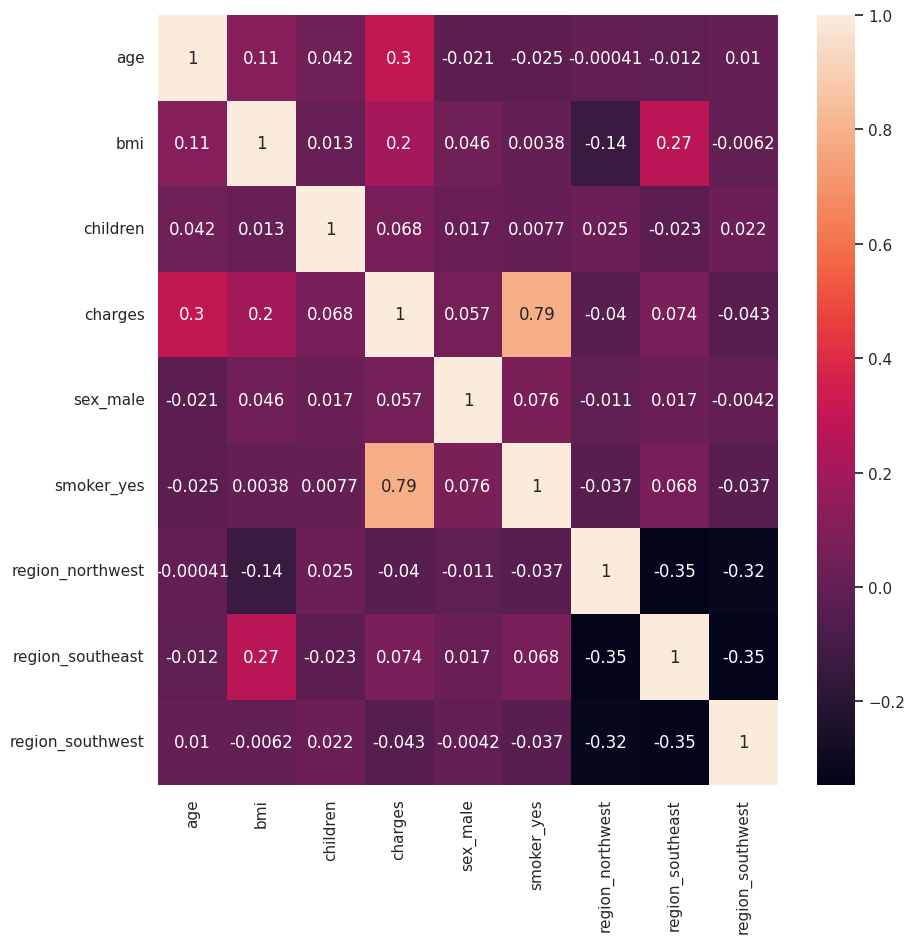

In [ ]:
sns.set_theme(rc={'figure.figsize':(10,10)})
sns.heatmap(insurance_w_dummies.corr(),annot=True)

<Axes: xlabel='smoker'>

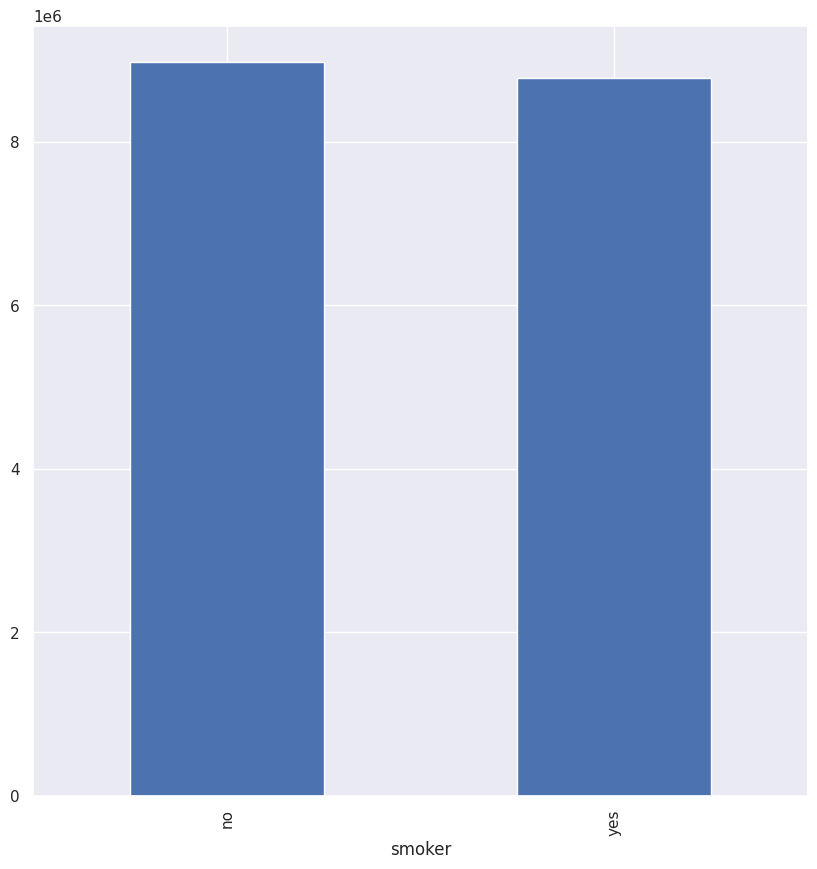

In [ ]:
insurance_df.groupby('smoker')['charges'].sum().plot(kind='bar')

In [ ]:
index_for_children = insurance_num_columns.index('children')
insurance_num_columns.pop(index_for_children)

'children'

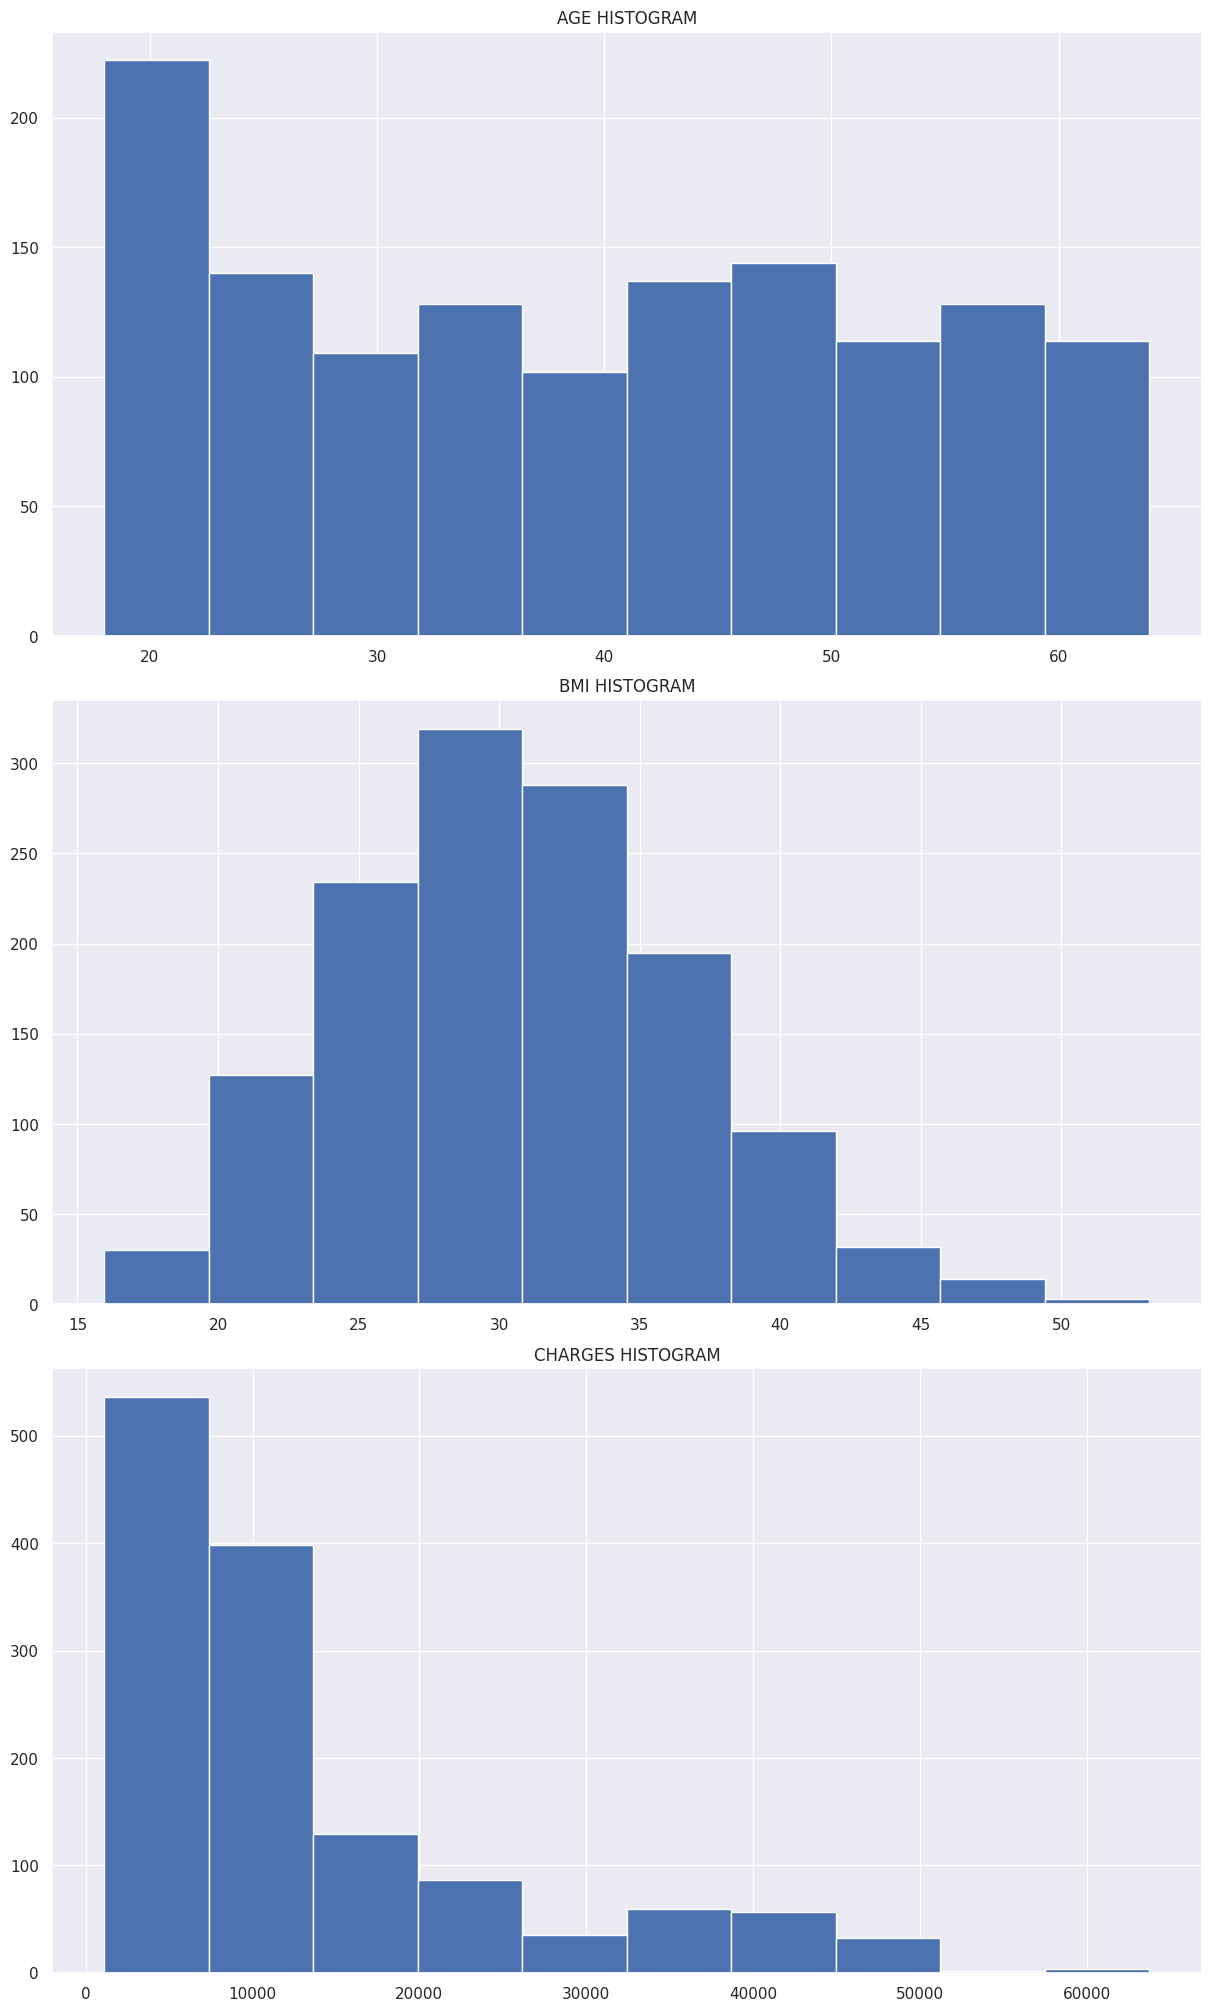

In [ ]:
fig, ax = plt.subplots(nrows=len(insurance_num_columns), ncols=1,figsize=(12,20),constrained_layout=True)
for index, column in enumerate(insurance_num_columns):
  ax[index].hist(insurance_df[column])
  ax[index].set_title("{} HISTOGRAM".format(column.upper()))

In [ ]:
X = insurance_w_dummies[['age','smoker_yes']]
y = insurance_w_dummies['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=617)

model = LinearRegression()
model.fit(X_train,y_train)

train_predictions = model.predict(X_train)

coefs = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_train,train_predictions)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
R2 = r2_score(y_train, train_predictions)

print('The coefficients are {}'.format(coefs))
print('The intercept is {}'.format(intercept))
print('The mean squared error is {}'.format(mse))
print('The root mean squared error is {}'.format(rmse))
print('The r is {}'.format(R2))


The coefficients are [  276.31150538 23618.75374363]
The intercept is -2428.083807942483
The mean squared error is 40712660.12404453
The root mean squared error is 6380.647312306529
The r is 0.7229452668906888


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


model.fit(X_train_scaled,y_train)

train_predictions = model.predict(X_train_scaled)

coefs = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_train,train_predictions)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
R2 = r2_score(y_train, train_predictions)

print('The coefficients are {}'.format(coefs))
print('The intercept is {}'.format(intercept))
print('The mean squared error is {}'.format(mse))
print('The root mean squared error is {}'.format(rmse))
print('The r is {}'.format(R2))

The coefficients are [3909.15386322 9640.47967398]
The intercept is 13330.24299381215
The mean squared error is 40712660.12404454
The root mean squared error is 6380.64731230653
The r is 0.7229452668906887


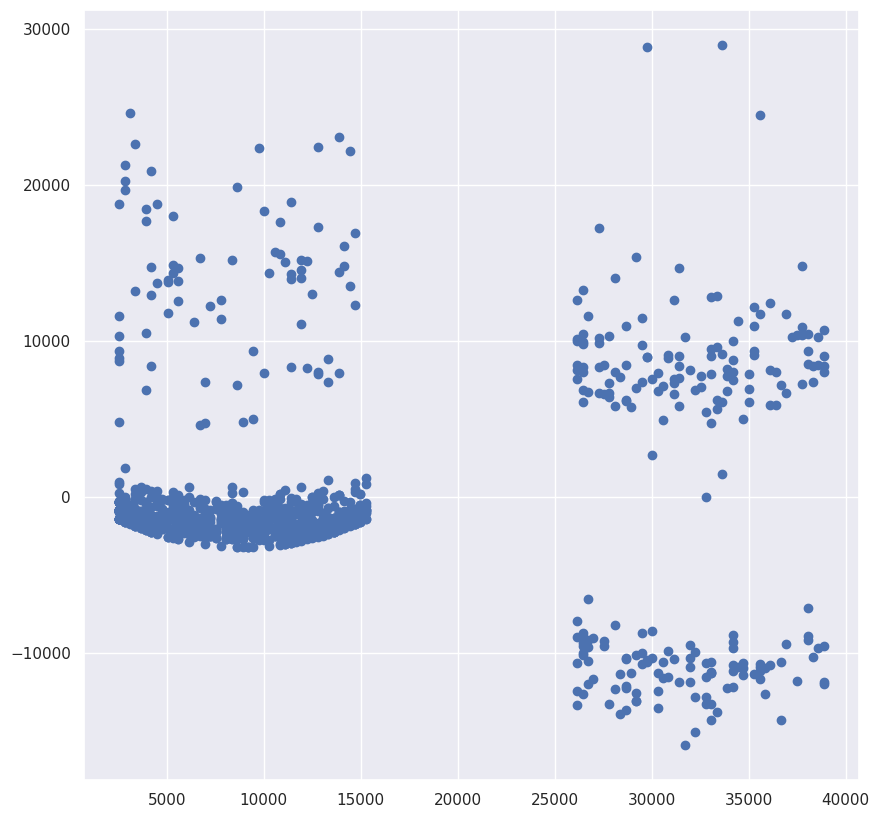

In [ ]:
residuals = y_train - train_predictions

plt.scatter(train_predictions,residuals)
plt.show()

### Why Log Transformation Helps:

**Handling Skewed Data:**
Insurance costs (charges) are often highly skewed, with a few individuals having extremely high costs. A log transformation helps to normalize the distribution, making the data more suitable for linear regression models.

**Reducing Outlier Impact:**
By transforming the target variable using `np.log2`, you likely reduced the impact of outliers and made the residuals more evenly distributed around zero.

**Reverting Back to Original Scale:**
After making predictions on the log-transformed scale, you reverted the predictions and actual values back to the original scale using `2 ** test_predictions` and `2 ** y_test`. This ensures that the final predictions are interpretable in terms of actual insurance costs.

In [ ]:
y_train = np.log2(y_train)
model.fit(X_train_scaled,y_train)
train_predictions = model.predict(X_train_scaled)

train_predictions_exp = 2 ** train_predictions
y_train_exp = 2 ** y_train

r2 = r2_score(y_train_exp, train_predictions_exp)
print("R²:", r2)


R²: 0.7171334304067185


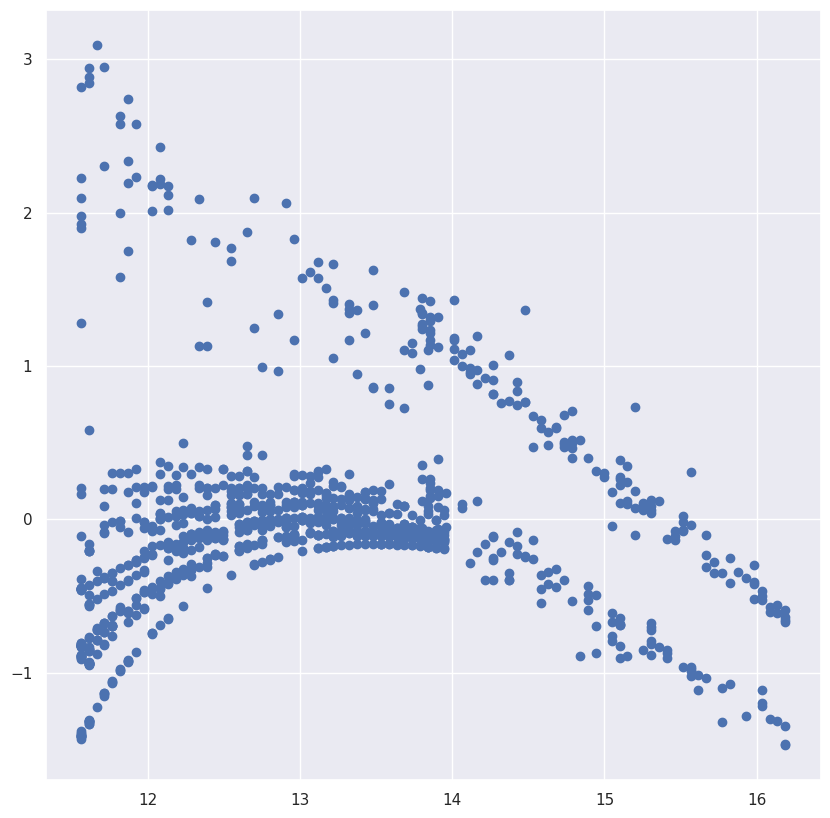

In [ ]:
residuals = y_train - train_predictions

plt.scatter(train_predictions,residuals)
plt.show()

The final R-squared value of 0.747 indicates that the model explains approximately 74.7% of the variance in the insurance costs. This is a relatively strong performance, and it suggests that the model's predictions are close to the actual values.

Residuals vs. Predictions:

A high R-squared value typically corresponds to residuals that are randomly distributed around zero. This means that the model is not systematically overpredicting or underpredicting the target variable.

By improving the model's fit (through log transformation, scaling, and potentially other techniques), you ensured that the residuals are centered around zero, indicating unbiased predictions.

In [ ]:
np.random.seed(3)

y_test = np.log2(y_test)
X_test_scaled = scaler.transform(X_test)

test_predictions = model.predict(X_test_scaled)

test_predictions_exp = 2 ** test_predictions
y_test_exp = 2 ** y_test


r2 = r2_score(y_test_exp, test_predictions)
print("R SQUARED:", r2)


R SQUARED: 0.7472250860666065
